<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [4]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [5]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')

In [6]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [7]:
client_info = pd.read_excel(xls,'CLIENT_INFO')
loan_history = pd.read_excel(xls,'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [8]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [14]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [15]:
marketing_history.head()


,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [16]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [17]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID'])

In [18]:
df =df.drop(['ID'],axis=1)

### Task 4: Data Prep & Start H2O

In [19]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp8a6645wn
  JVM stdout: /tmp/tmp8a6645wn/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp8a6645wn/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,3 months and 9 days !!!
H2O_cluster_name:,H2O_from_python_rhyme_881sn9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [20]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [22]:
train, test = h2o_df.split_frame(ratios=[.075])


x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [23]:
from h2o.automl import H2OAutoML

In [24]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes = True,
                stopping_metric = 'logloss',
                seed = 1,
               project_name = 'Final')

%time aml.train(x=x, y=y, training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 2s, sys: 1.13 s, total: 1min 3s
Wall time: 9min 40s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [25]:
lb =  aml.leaderboard
lb.head(rows= lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200823_195032,0.922852,0.229359,0.56195,0.166689,0.259216,0.0671928
XGBoost_grid__1_AutoML_20200823_195032_model_40,0.921496,0.208117,0.573865,0.18562,0.252347,0.0636791
GBM_grid__1_AutoML_20200823_195032_model_3,0.920153,0.216413,0.555033,0.17178,0.258436,0.0667891
XGBoost_grid__1_AutoML_20200823_195032_model_5,0.920135,0.209974,0.564221,0.181004,0.253385,0.0642038
GBM_grid__1_AutoML_20200823_195032_model_5,0.919892,0.243254,0.537396,0.162893,0.270412,0.0731227
StackedEnsemble_AllModels_AutoML_20200823_195032,0.919382,0.226301,0.548066,0.201413,0.258879,0.0670181
GBM_grid__1_AutoML_20200823_195032_model_1,0.919059,0.212171,0.559298,0.200918,0.257065,0.0660825
XGBoost_grid__1_AutoML_20200823_195032_model_12,0.918999,0.210687,0.547369,0.187426,0.253794,0.0644112
XGBoost_grid__1_AutoML_20200823_195032_model_9,0.918503,0.217139,0.54496,0.178195,0.259637,0.0674114
GBM_grid__1_AutoML_20200823_195032_model_17,0.918433,0.250369,0.522124,0.177364,0.275378,0.075833


In [26]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [28]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200823_195032_model_40',
  0.8857486924030595,
  1.0,
  0.6699492850705192),
 ('GBM_grid__1_AutoML_20200823_195032_model_3',
  0.2361776365136141,
  0.2666418122197369,
  0.17863649146652036),
 ('GLM_1_AutoML_20200823_195032',
  0.16636730822796378,
  0.18782676130924325,
  0.12583440445623859),
 ('DeepLearning_1_AutoML_20200823_195032',
  0.033819412516763674,
  0.03818172446296332,
  0.02557981900672183),
 ('XRT_1_AutoML_20200823_195032', 0.0, 0.0, 0.0),
 ('DRF_1_AutoML_20200823_195032', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [29]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200823_195032_model_40')
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06796916868792316
RMSE: 0.26070897316341674
LogLoss: 0.2209905740792377
Mean Per-Class Error: 0.15858531720528724
AUC: 0.9144912679229268
AUCPR: 0.5701403799006725
Gini: 0.8289825358458536

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27861853192249936: 


,,no,yes,Error,Rate
0,no,34077.0,2799.0,0.0759,(2799.0/36876.0)
1,yes,1645.0,3264.0,0.3351,(1645.0/4909.0)
2,Total,35722.0,6063.0,0.1064,(4444.0/41785.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.278619,0.594969,216.0
1,max f2,0.120262,0.695648,287.0
2,max f0point5,0.424681,0.581870,164.0
3,max accuracy,0.501201,0.903051,134.0
4,max precision,0.945247,1.000000,0.0
5,max recall,0.004359,1.000000,398.0
6,max specificity,0.945247,1.000000,0.0
7,max absolute_mcc,0.193060,0.540137,252.0
8,max min_per_class_accuracy,0.111521,0.839652,292.0
9,max mean_per_class_accuracy,0.094189,0.841415,303.0



Gains/Lift Table: Avg response rate: 11.75 %, avg score: 11.27 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010004,0.794651,6.516300,6.516300,0.765550,0.843638,0.765550,0.843638,0.065186,0.065186,551.630001,551.630001
1,,2,0.020007,0.731565,5.722126,6.119213,0.672249,0.761481,0.718900,0.802560,0.057242,0.122428,472.212595,511.921298
2,,3,0.030011,0.683550,5.640672,5.959699,0.662679,0.707201,0.700159,0.770774,0.056427,0.178855,464.067220,495.969938
3,,4,0.040014,0.640254,5.518492,5.849397,0.648325,0.661285,0.687201,0.743401,0.055205,0.234060,451.849157,484.939743
4,,5,0.050018,0.603543,4.989042,5.677326,0.586124,0.620900,0.666986,0.718901,0.049908,0.283968,398.904219,467.732638
5,,6,0.100012,0.432392,4.555444,5.116520,0.535184,0.518270,0.601101,0.618610,0.227745,0.511713,355.544427,411.651956
6,,7,0.150006,0.262339,3.284157,4.505830,0.385831,0.343736,0.529355,0.527000,0.164188,0.675901,228.415750,350.582965
7,,8,0.200000,0.158995,2.200304,3.929517,0.258497,0.205252,0.461649,0.446572,0.110002,0.785903,120.030403,292.951721
8,,9,0.300012,0.069877,1.097852,2.985553,0.128978,0.105928,0.350750,0.333015,0.109798,0.895702,9.785193,198.555349
9,,10,0.400000,0.036146,0.576561,2.383377,0.067736,0.050436,0.280005,0.262379,0.057649,0.953351,-42.343885,138.337747


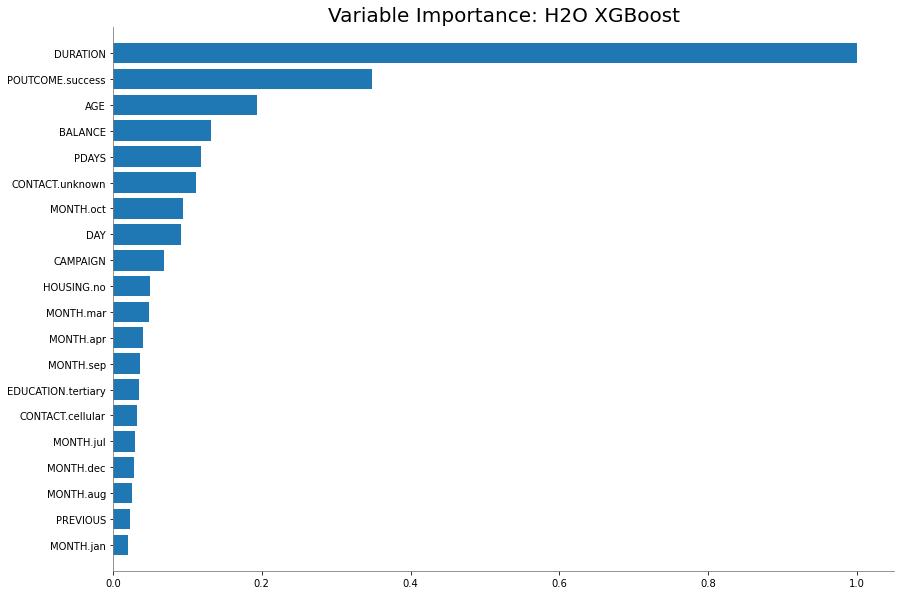

In [31]:
model.varimp_plot(num_of_features=20)